The link to the dataset is: https://www.kaggle.com/datasets/mdimran6666/heart-disease-nowadays


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [3]:
# upload data
df = pd.read_csv("balanced_dataset.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,20.34,0,0,1,0,0,0,0,80,0,0,1,3,7,0,0,0
1,0,24.21,0,0,0,0,0,0,0,77,0,0,0,2,6,0,0,1
2,0,31.64,1,0,0,5,0,1,0,80,0,2,0,2,9,1,0,0
3,0,28.37,1,0,0,0,0,1,1,77,0,2,1,3,8,0,0,0
4,0,28.15,0,0,0,7,0,1,0,80,0,0,0,2,7,0,0,0


In [11]:
# common quick check, do we have missing values, and if so
# in which variables
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [12]:
#  Let's compare the variables, can we drop something?

# remember: any variable that doesn't bring anything to the table
# is essentially just noise for the machine learning model
corr_matrix = df.corr()['HeartDisease']
corr_matrix.sort_values(ascending=False)

HeartDisease        1.00
AgeCategory         0.23
Stroke              0.15
Diabetic            0.13
DiffWalking         0.13
KidneyDisease       0.11
Smoking             0.09
SkinCancer          0.09
Sex                 0.09
PhysicalHealth      0.06
BMI                 0.04
SleepTime           0.03
Asthma              0.01
AlcoholDrinking    -0.03
Race               -0.05
PhysicalActivity   -0.05
MentalHealth       -0.05
GenHealth          -0.19
Name: HeartDisease, dtype: float64

In [13]:
 # by inspecting correlation matrix and SelectKBest results
# we decided to drop these variables, since they don't really bring anything into the result
# thus resulting in extra noise in the dataset
removables = ["GenHealth", "MentalHealth", "PhysicalActivity", "Race", "AlcoholDrinking", "Asthma", "SleepTime"]
df = df.drop(removables, axis=1)

In [14]:
# 
df['HeartDisease'] = df['HeartDisease'].replace({0: "No", 1: "Yes"})

In [15]:
df.head()

,HeartDisease,BMI,Smoking,Stroke,PhysicalHealth,DiffWalking,Sex,AgeCategory,Diabetic,KidneyDisease,SkinCancer
0,No,20.34,0,1,0,0,0,80,0,0,0
1,No,24.21,0,0,0,0,0,77,0,0,1
2,No,31.64,1,0,5,1,0,80,2,0,0
3,No,28.37,1,0,0,1,1,77,2,0,0
4,No,28.15,0,0,7,1,0,80,0,0,0


In [16]:
# save the categories into a list
categories = list(np.unique(df['HeartDisease']))
print(categories)

['No', 'Yes']


In [17]:
#  X/y train/test/validation -split

# everything else except the target variable
X = df.drop("HeartDisease", axis=1)

# have only the target variable here (dependent variable)
y_temp = df['HeartDisease']

# since we are doing classification, we have to process our target values with an encoder
# and convert them into a categorical TensorFlow/Keras -format 
le = LabelEncoder()
y_enc = le.fit_transform(y_temp)

# Converting the label into a matrix form
y = tf.keras.utils.to_categorical(y_enc)

In [18]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# convert all continuous variables to integer,
# and convert all negative numbers to 0
X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

# initialize chi2 and SelectKBest
# Note: chi2 -test is a very common test
# in statistics and quantitative analysis
# basically it studies the data whether variables are related
# or independent of each other
chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))

# fit our data to the SelectKBest
best_features = chi_2_features.fit(X_cat,y.astype(int))

# use decimal format in table print later
pd.options.display.float_format = '{:.2f}'.format

# wrap it up, and show the results
# the higher the score, the more effect that column has on target variable
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

# AgeCategory, Diabetic, Stroke
# have the most impact on the target variable

,Features,Score
6,AgeCategory,59552.11
7,Diabetic,6199.46
2,Stroke,4583.15
4,DiffWalking,3256.44
3,PhysicalHealth,3143.94
8,KidneyDisease,2281.46
9,SkinCancer,1435.77
1,Smoking,1067.90
5,Sex,737.30
0,BMI,335.71


In [20]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [ ]:
#  Create neural network model
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(len(X.columns),)),
        layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l1(l1=0.1)),
        layers.Dense(8, activation="relu"),
        layers.Dense(len(categories), activation="softmax")
    ]
)

# compile the model, this time we use categorical crossentropy for loss -function
# and we also measure the accuracy of our model in the metrics
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\e1003118\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 370 (1.45 KB)

 Trainable params: 350 (1.37 KB)

 Non-trainable params: 20 (80.00 B)

In [22]:
# train model
model.fit(x=X_train, y=y_train, epochs=400, validation_data=(X_val, y_val))

Epoch 1/400
4366/4366 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9103 - loss: 0.8801 - val_accuracy: 0.9258 - val_loss: 0.2682
Epoch 2/400
4366/4366 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9260 - loss: 0.2539 - val_accuracy: 0.9258 - val_loss: 0.2331
Epoch 3/400
4366/4366 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9277 - loss: 0.2313 - val_accuracy: 0.9258 - val_loss: 0.2323
Epoch 4/400
4366/4366 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9256 - loss: 0.2339 - val_accuracy: 0.9258 - val_loss: 0.2300
Epoch 5/400
4366/4366 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9261 - loss: 0.2323 - val_accuracy: 0.9258 - val_loss: 0.2295
Epoch 6/400
4366/4366 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9269 - loss: 0.2295 - val_accuracy: 0.9258 - val_loss: 0.2332
Epoch 7/400
4366/4366 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9265 - loss: 0.2290 - val_accuracy: 0.9258 - val_loss: 0.2292
Epoch 8/400
4366/4366 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9266 - loss: 0

<Axes: >

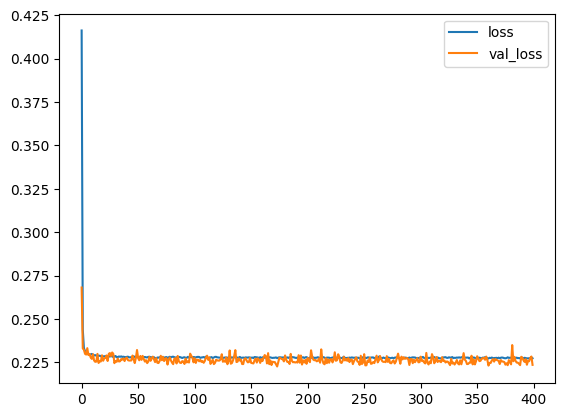

In [23]:
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()

<Axes: >

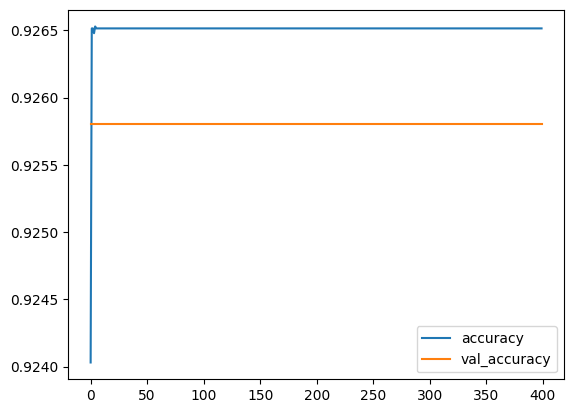

In [24]:
loss_df[['accuracy', 'val_accuracy']].plot()

In [25]:
# compare the final model loss/accuracy/evaluation values
# the values should again match mostly
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))


Test data evaluation:
[0.22621914744377136, 0.9251686930656433]

Train data evaluation:
[0.22356168925762177, 0.9265148043632507]


In [26]:
 # get predictions and convert with argmax() to get categories 
# instead of raw probabilities
test_predictions = model.predict(X_test)
test_predictions = np.argmax(test_predictions, axis=1)

# convert also y-test -values with argmax
y_test = np.argmax(y_test, axis=1)

936/936 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


<Axes: >

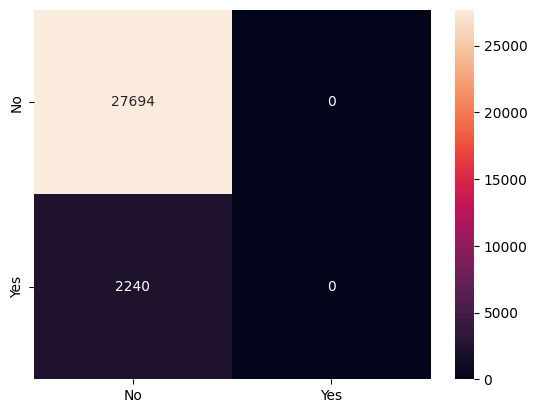

In [27]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, test_predictions), xticklabels=categories, yticklabels=categories, annot=True, fmt='g')

In [28]:
# print the classification report based on true values and predictions
print(classification_report(y_test, test_predictions, target_names=categories))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

          No       0.93      1.00      0.96     27694
         Yes       0.00      0.00      0.00      2240

    accuracy                           0.93     29934
   macro avg       0.46      0.50      0.48     29934
weighted avg       0.86      0.93      0.89     29934


Model overall accuracy: 92.52%


C:\Users\e1003118\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\e1003118\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\e1003118\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classific

In [29]:
# In multi category classification , AUC values are often interpreted as follows: 
# 0.5-0.6 (failed)
# 0.6-0.7 (worthless)
# 0.7-0.8 (poor)
# 0.8-0.9 (good)
# > 0.9 (excellent)

# get ROC-AUC -score
roc_auc_score(y, model.predict(X), multi_class="ovr")

6237/6237 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


0.8145352115158473

In [30]:
 df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'Stroke', 'PhysicalHealth',
       'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

In [ ]:
# let's try with some new imaginary data
# modify this as needed regarding your own dataset
tester_row = {
    'battery_power': 800, 
    'fc': 12, 
    'int_memory': 2,  
    'mobile_wt': 300, 
    'n_cores': 4, 
    'pc': 36,
    'px_width': 1890,
    'px_height': 1222, 
    'ram': 8096,
    'sc_h': 13, 
    'sc_w': 4, 
    'talk_time': 19
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])
result = model.predict(tester_row)[0]
result_text = categories[np.argmax(result)]

# 0 cheapest, 3 most expensive
print("-> 0 cheapest, 3 most expensive category")
print(f"Predicted price range: {result_text}")